<center>
 <h1>Bài thực hành 6. MÔ HÌNH PHÂN LỚP (Phần 2)</h1>
</center>

<h3>1. PHÂN LỚP VĂN BẢN</h3>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import pandas as pd
X_train = pd.read_csv('/content/drive/MyDrive/UIT-VSFC/train/sents.txt', sep='\r\n',
header=None, index_col=None)
y_train = pd.read_csv('/content/drive/MyDrive/UIT-VSFC/train/sentiments.txt', sep='\r\n',
header=None, index_col=None)
X_test = pd.read_csv('/content/drive/MyDrive/UIT-VSFC/test/sents.txt', sep='\r\n',
header=None, index_col=None)
y_test = pd.read_csv('/content/drive/MyDrive/UIT-VSFC/test/sentiments.txt', sep='\r\n',
header=None, index_col=None)


<ipython-input-44-be3f124e5723>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  X_train = pd.read_csv('/content/drive/MyDrive/UIT-VSFC/train/sents.txt', sep='\r\n',
<ipython-input-44-be3f124e5723>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  y_train = pd.read_csv('/content/drive/MyDrive/UIT-VSFC/train/sentiments.txt', sep='\r\n',
<ipython-input-44-be3f124e5723>:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.

<h3>2. BÀI TẬP</h3>

###Bài tập 1.

In [45]:
X_train.shape

(11426, 1)

In [46]:
X_test.shape

(3166, 1)

In [47]:
X_train.describe()

,0
count,11426
unique,11425
top,"thầy dạy hay , tuy nhiên còn nhiều chỗ chưa th..."
freq,2


In [48]:
X_train.head()

,0
0,slide giáo trình đầy đủ .
1,"nhiệt tình giảng dạy , gần gũi với sinh viên ."
2,đi học đầy đủ full điểm chuyên cần .
3,chưa áp dụng công nghệ thông tin và các thiết ...
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng..."


####a) Mục tiêu/tác vụ mà bộ dữ liệu hướng tới là gì?
>Sử dụng cho các tác vụ sentiment-based và topic-based
####b) Kích thước của tập train và test?
>Kích thước tập train: (11426, 1)\
   Kích thước tập test: (3166, 1)


In [49]:
y_train_values = y_train.values.flatten()
y_train_stats = [(y_train_values==0).sum(),(y_train_values==1).sum(),(y_train_values==2).sum()]
y_train_stats

[5325, 458, 5643]

In [50]:
y_test_values = y_test.values.flatten()
y_test_stats = [(y_test_values==0).sum(),(y_test_values==1).sum(),(y_test_values==2).sum()]
y_test_stats

[1409, 167, 1590]

Text(0.5, 1.0, 'Biểu đồ số lượng mẫu theo từng label trong tập train')

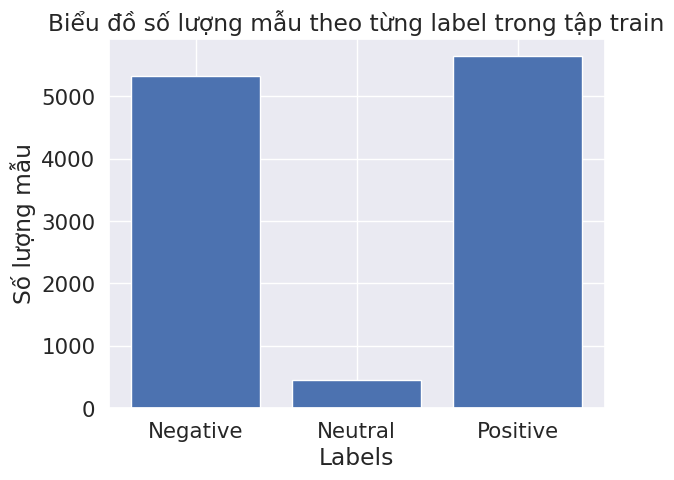

In [51]:
import matplotlib.pyplot as plt

plt.bar(['Negative','Neutral','Positive'], y_train_stats)
plt.xlabel('Labels')
plt.ylabel('Số lượng mẫu')
plt.title('Biểu đồ số lượng mẫu theo từng label trong tập train')

*Từ biểu đồ trên ta thấy, số lượng mẫu Positive trong tập train cao nhất, và thấp nhất là Neutral.*

Text(0.5, 1.0, 'Biểu đồ số lượng mẫu theo từng label trong tập test')

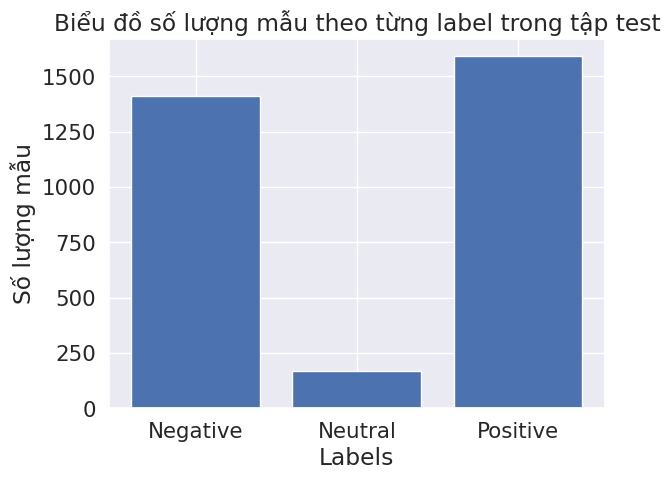

In [52]:
plt.bar(['Negative','Neutral','Positive'], y_test_stats)
plt.xlabel('Labels')
plt.ylabel('Số lượng mẫu')
plt.title('Biểu đồ số lượng mẫu theo từng label trong tập test')

*Từ biểu đồ trên ta thấy, số lượng mẫu Positive trong tập test cao nhất, và thấp nhất là Neutral.*

In [53]:
!pip -q install underthesea
!pip -q install gradio
!pip -q install Unidecode

In [54]:
import re
import os

import numpy as np
import pandas as pd


from underthesea import word_tokenize
from unidecode import unidecode
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score

### Bài tập 2.

####Dùng thư viện CountVectorizer để trích xuất đặc trưng từ dữliệu văn bản cho tác vụ sentiment-based.

In [55]:
encoder = CountVectorizer(ngram_range=(1,1))
encoder.fit(X_train[0])

X_train_encoded = encoder.transform(X_train[0])
X_test_encoded = encoder.transform(X_test[0])
print(X_test_encoded)

  (0, 82)	1
  (0, 931)	1
  (0, 968)	1
  (0, 1289)	1
  (0, 1701)	1
  (1, 585)	1
  (1, 1458)	1
  (1, 1821)	1
  (1, 1923)	1
  (1, 1935)	1
  (2, 365)	1
  (2, 366)	1
  (2, 1031)	1
  (2, 1809)	1
  (3, 121)	1
  (3, 477)	1
  (3, 515)	1
  (3, 596)	1
  (3, 729)	1
  (3, 1608)	1
  (4, 497)	1
  (4, 502)	1
  (4, 585)	1
  (4, 596)	1
  (4, 708)	1
  :	:
  (3163, 2318)	1
  (3164, 268)	1
  (3164, 535)	1
  (3164, 1608)	1
  (3164, 1702)	1
  (3165, 82)	1
  (3165, 118)	1
  (3165, 365)	1
  (3165, 535)	1
  (3165, 760)	1
  (3165, 779)	1
  (3165, 825)	1
  (3165, 849)	2
  (3165, 964)	1
  (3165, 975)	1
  (3165, 1120)	2
  (3165, 1157)	1
  (3165, 1207)	1
  (3165, 1681)	1
  (3165, 1701)	1
  (3165, 1703)	1
  (3165, 1735)	1
  (3165, 1764)	1
  (3165, 1809)	1
  (3165, 2300)	1


In [56]:
encoder.vocabulary_

{'slide': 1500,
 'giáo': 585,
 'trình': 1749,
 'đầy': 2383,
 'đủ': 2432,
 'nhiệt': 1211,
 'tình': 1817,
 'giảng': 596,
 'dạy': 497,
 'gần': 639,
 'gũi': 633,
 'với': 1983,
 'sinh': 1494,
 'viên': 1923,
 'đi': 2317,
 'học': 760,
 'full': 558,
 'điểm': 2319,
 'chuyên': 224,
 'cần': 393,
 'chưa': 256,
 'áp': 2293,
 'dụng': 523,
 'công': 367,
 'nghệ': 1152,
 'thông': 1639,
 'tin': 1694,
 'và': 1937,
 'các': 353,
 'thiết': 1595,
 'bị': 174,
 'hỗ': 773,
 'trợ': 1785,
 'cho': 219,
 'việc': 1928,
 'thầy': 1663,
 'bài': 121,
 'hay': 662,
 'có': 365,
 'nhiều': 1207,
 'tập': 1858,
 'ví': 1947,
 'dụ': 521,
 'ngay': 1138,
 'trên': 1747,
 'lớp': 1015,
 'đảm': 2377,
 'bảo': 158,
 'thời': 1681,
 'gian': 574,
 'lên': 954,
 'tích': 1819,
 'cực': 425,
 'trả': 1767,
 'lời': 1017,
 'câu': 361,
 'hỏi': 764,
 'của': 418,
 'thường': 1652,
 'xuyên': 2257,
 'đặt': 2397,
 'em': 535,
 'sẽ': 1556,
 'nợ': 1314,
 'môn': 1077,
 'này': 1279,
 'nhưng': 1235,
 'lại': 979,
 'kỳ': 902,
 'kế': 897,
 'tiếp': 1702,
 'lượng':

In [57]:
for key in encoder.vocabulary_.keys():
  if encoder.vocabulary_[key]==1749:
    print(key)

trình


<h3> Bài tập 3.</h3>

### **Huấn luyện mô hình:**

####**(a) Sử dụng mô hình Logistic Regression và SVM để huấn luyện.**

In [58]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(max_iter = 1000)
lrc.fit(X_train_encoded,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [59]:
lrc_predict = lrc.predict(X_test_encoded)

In [60]:
from sklearn.metrics import confusion_matrix
accuracy_score(y_test_values,lrc_predict)

0.8840808591282375

In [61]:
lrc_rp = classification_report(y_test_values,lrc_predict,target_names=['Negative','Neutral','Positive'],zero_division = 1)
print(lrc_rp)

              precision    recall  f1-score   support

    Negative       0.88      0.92      0.90      1409
     Neutral       0.49      0.22      0.30       167
    Positive       0.91      0.92      0.91      1590

    accuracy                           0.88      3166
   macro avg       0.76      0.69      0.70      3166
weighted avg       0.87      0.88      0.88      3166



In [62]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train_encoded,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [63]:
svc_pred = svc.predict(X_test_encoded)
accuracy_score(y_test_values,svc_pred)

0.8796588755527479

####**(b) Đánh giá mô hình bằng các độ đo accuracy_score, precision, recall và macro f1-score. So sánh hiệu năng của 2 mô hình.**

In [64]:
svc_rp = classification_report(y_test_values,svc_pred,target_names=['Negative','Neutral','Positive'],zero_division = 1)
print(svc_rp)

              precision    recall  f1-score   support

    Negative       0.88      0.92      0.90      1409
     Neutral       0.47      0.29      0.36       167
    Positive       0.91      0.91      0.91      1590

    accuracy                           0.88      3166
   macro avg       0.75      0.71      0.72      3166
weighted avg       0.87      0.88      0.87      3166



>Dựa vào kết qủa của 2 mô mô hình ta thấy, có vẻ như mô hình SVM có hiệu suất nhỉnh hơn so với mô hình 1, đặc biệt là đối với lớp Neutral.

#### **(c) Ma trận nhầm lẫn (confusion matrix)**

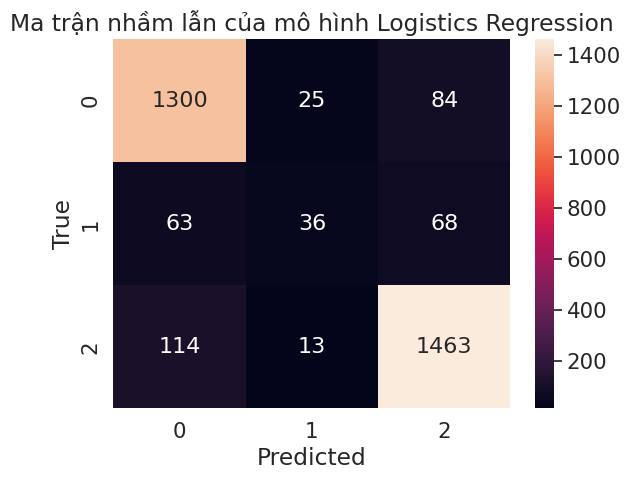

In [85]:
import seaborn as sns
cm_lr = confusion_matrix(y_test_values,lrc_predict)
sns.set(font_scale=1.4)
sns.heatmap(cm_lr, annot=True, annot_kws={"size": 16}, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Ma trận nhầm lẫn của mô hình Logistics Regression')
plt.show()

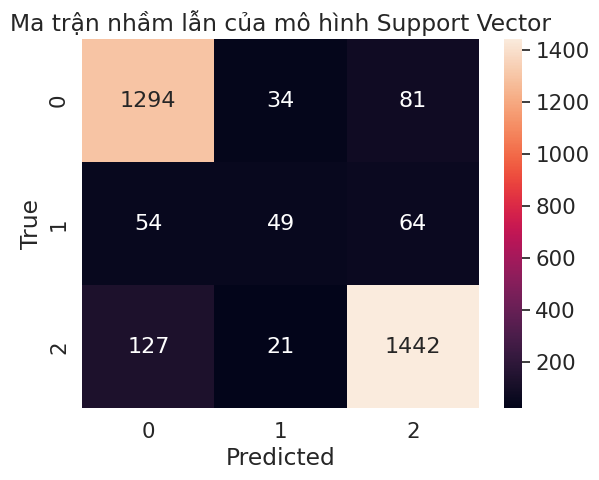

In [86]:
cm_svc = confusion_matrix(y_test_values,svc_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm_svc, annot=True, annot_kws={"size": 16}, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Ma trận nhầm lẫn của mô hình Support Vector')
plt.show()

>Dựa vào ma trận nhầm lẫn của 2 mô hình trên ta thấy, mô hình SVM có hiệu suất cao hơn.

In [67]:
true_label = {
    0:"Negative",
    1:"Neutral",
    2:"Positive"
}


In [68]:
input_text = input("Nhập câu cần dự đoán: ")
input_encoded = encoder.transform([input_text])
label = lrc.predict(input_encoded)
print("Nhãn dự đoán",true_label[label[0]])

Nhập câu cần dự đoán: thầy dạy dễ hiều
Nhãn dự đoán Positive


<h3> Bài tập 4.</h4>

#### Trích xuất đặc trưng cho dữ liệu văn bản bằng TfidfVectorizer

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_encoder = TfidfVectorizer(ngram_range = (1,1))
tfidf_encoder.fit(X_train[0])

TfidfVectorizer()

In [70]:
X_train_tfidf = tfidf_encoder.transform(X_train[0])
X_test_tfidf = tfidf_encoder.transform(X_test[0])

In [71]:
print(X_train_tfidf[0])

  (0, 2432)	0.4513422182886176
  (0, 2383)	0.4836433028523334
  (0, 1749)	0.41120516959565895
  (0, 1500)	0.48482771504142425
  (0, 585)	0.3977835502153309


In [72]:
print(tfidf_encoder.vocabulary_)

{'slide': 1500, 'giáo': 585, 'trình': 1749, 'đầy': 2383, 'đủ': 2432, 'nhiệt': 1211, 'tình': 1817, 'giảng': 596, 'dạy': 497, 'gần': 639, 'gũi': 633, 'với': 1983, 'sinh': 1494, 'viên': 1923, 'đi': 2317, 'học': 760, 'full': 558, 'điểm': 2319, 'chuyên': 224, 'cần': 393, 'chưa': 256, 'áp': 2293, 'dụng': 523, 'công': 367, 'nghệ': 1152, 'thông': 1639, 'tin': 1694, 'và': 1937, 'các': 353, 'thiết': 1595, 'bị': 174, 'hỗ': 773, 'trợ': 1785, 'cho': 219, 'việc': 1928, 'thầy': 1663, 'bài': 121, 'hay': 662, 'có': 365, 'nhiều': 1207, 'tập': 1858, 'ví': 1947, 'dụ': 521, 'ngay': 1138, 'trên': 1747, 'lớp': 1015, 'đảm': 2377, 'bảo': 158, 'thời': 1681, 'gian': 574, 'lên': 954, 'tích': 1819, 'cực': 425, 'trả': 1767, 'lời': 1017, 'câu': 361, 'hỏi': 764, 'của': 418, 'thường': 1652, 'xuyên': 2257, 'đặt': 2397, 'em': 535, 'sẽ': 1556, 'nợ': 1314, 'môn': 1077, 'này': 1279, 'nhưng': 1235, 'lại': 979, 'kỳ': 902, 'kế': 897, 'tiếp': 1702, 'lượng': 975, 'quá': 1413, 'dài': 463, 'không': 849, 'thu': 1608, 'hiệu': 679, 

In [73]:

lrc_tfidf = LogisticRegression(max_iter = 1000)
lrc_tfidf.fit(X_train_tfidf,y_train)

lrc_tfidf_predict = lrc_tfidf.predict(X_test_tfidf)

accuracy_score(y_test_values,lrc_tfidf_predict)
lrc_rp_tfidf = classification_report(y_test_values,lrc_tfidf_predict,target_names=['Negative','Neutral','Positive'],zero_division = 1)
print(lrc_rp_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

    Negative       0.85      0.95      0.90      1409
     Neutral       0.61      0.08      0.15       167
    Positive       0.92      0.90      0.91      1590

    accuracy                           0.88      3166
   macro avg       0.79      0.65      0.65      3166
weighted avg       0.87      0.88      0.86      3166



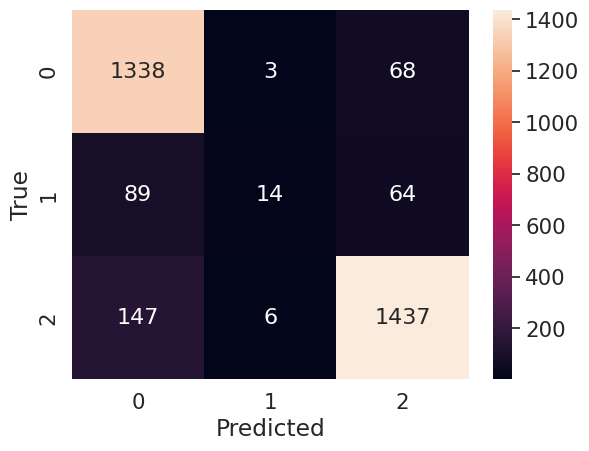

In [74]:
import seaborn as sns
cm_lr_tfidf = confusion_matrix(y_test_values,lrc_tfidf_predict)
sns.set(font_scale=1.4)
sns.heatmap(cm_lr_tfidf, annot=True, annot_kws={"size": 16}, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

>Dựa vào kết quả trên ta thấy, phương pháp trích xuất
đặc trưng bằng TfidfVectorizer có hiệu năng thấp hơn CountVectorizer.

<h3>Bài tập 5. </h3>

#### Lưu mô hình đã huấn luyện thành file.

In [75]:
from pickle import dump,load
output_model = open('lrc.pkl','wb')
dump(lrc,output_model)
output_model.close()

In [76]:
input_model = open('lrc.pkl','rb')
model = load(input_model)

<h3>Bài tập 6.</h3>


**Sử dụng thư viện underthesea  [Github](https://github.com/undertheseanlp/underthesea) để tách từ tiếng Việt.**

In [77]:
import underthesea
sents_train = [word_tokenize(s) for s in X_train[0]]
sents_test = [word_tokenize(s) for s in X_test[0]]


In [78]:
print(sents_train)

[['slide', 'giáo trình', 'đầy đủ', '.'], ['nhiệt tình', 'giảng dạy', ',', 'gần gũi', 'với', 'sinh viên', '.'], ['đi', 'học', 'đầy đủ', 'full điểm', 'chuyên', 'cần', '.'], ['chưa', 'áp dụng', 'công nghệ thông tin', 'và', 'các', 'thiết bị', 'hỗ trợ', 'cho', 'việc', 'giảng dạy', '.'], ['thầy', 'giảng', 'bài', 'hay', ',', 'có', 'nhiều', 'bài tập', 'ví dụ', 'ngay', 'trên', 'lớp', '.'], ['giảng viên', 'đảm bảo', 'thời gian', 'lên lớp', ',', 'tích cực', 'trả lời', 'câu', 'hỏi', 'của', 'sinh viên', ',', 'thường xuyên', 'đặt', 'câu', 'hỏi', 'cho', 'sinh viên', '.'], ['em', 'sẽ', 'nợ', 'môn', 'này', ',', 'nhưng', 'em', 'sẽ', 'học', 'lại', 'ở', 'các', 'học kỳ', 'kế tiếp', '.'], ['thời lượng', 'học', 'quá', 'dài', ',', 'không', 'đảm bảo', 'tiếp thu', 'hiệu quả', '.'], ['nội dung', 'môn học', 'có', 'phần', 'thiếu', 'trọng tâm', ',', 'hầu như', 'là', 'chung chung', ',', 'khái quát', 'khiến', 'sinh viên', 'rất', 'khó', 'nắm', 'được', 'nội dung', 'môn học', '.'], ['cần', 'nói', 'rõ', 'hơn', 'bằng', 'c

In [87]:

flattened_sents_train = [' '.join(sentence) for sentence in sents_train]
flattened_sents_test = [' '.join(sentence) for sentence in sents_test]

encoder = CountVectorizer(ngram_range=(1, 1))
encoder.fit(flattened_sents_train)

X_train_new_encoded = encoder.transform(flattened_sents_train)
X_test_new_encoded = encoder.transform(flattened_sents_test)


In [80]:
encoder.vocabulary_

{'slide': 1479,
 'giáo': 562,
 'trình': 1727,
 'đầy': 2361,
 'đủ': 2410,
 'nhiệt': 1190,
 'tình': 1795,
 'giảng': 573,
 'dạy': 474,
 'gần': 616,
 'gũi': 610,
 'với': 1961,
 'sinh': 1473,
 'viên': 1901,
 'đi': 2295,
 'học': 740,
 'full': 535,
 'điểm': 2297,
 'chuyên': 198,
 'cần': 366,
 'chưa': 230,
 'áp': 2271,
 'dụng': 500,
 'công': 340,
 'nghệ': 1131,
 'thông': 1617,
 'tin': 1672,
 'và': 1916,
 'các': 326,
 'thiết': 1574,
 'bị': 148,
 'hỗ': 753,
 'trợ': 1763,
 'cho': 193,
 'việc': 1907,
 'thầy': 1641,
 'bài': 95,
 'hay': 645,
 'có': 338,
 'nhiều': 1186,
 'tập': 1836,
 'ví': 1926,
 'dụ': 498,
 'ngay': 1118,
 'trên': 1725,
 'lớp': 995,
 'đảm': 2355,
 'bảo': 132,
 'thời': 1659,
 'gian': 551,
 'lên': 934,
 'tích': 1797,
 'cực': 398,
 'trả': 1745,
 'lời': 997,
 'câu': 334,
 'hỏi': 744,
 'của': 391,
 'thường': 1630,
 'xuyên': 2235,
 'đặt': 2375,
 'em': 512,
 'sẽ': 1535,
 'nợ': 1293,
 'môn': 1057,
 'này': 1258,
 'nhưng': 1214,
 'lại': 959,
 'kỳ': 882,
 'kế': 877,
 'tiếp': 1680,
 'lượng': 95

In [81]:
lrc_2 = LogisticRegression(max_iter = 1000)
lrc_2.fit(X_train_new_encoded,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [82]:
lrc_pred = lrc_2.predict(X_test_new_encoded)

In [83]:
accuracy_score(y_test_values,lrc_pred)

0.8837650031585597

In [84]:
lrc_rp_2 = classification_report(y_test_values,lrc_pred,target_names=['Negative','Neutral','Positive'],zero_division = 1)
print(lrc_rp_2)

              precision    recall  f1-score   support

    Negative       0.88      0.92      0.90      1409
     Neutral       0.48      0.21      0.29       167
    Positive       0.91      0.92      0.91      1590

    accuracy                           0.88      3166
   macro avg       0.75      0.68      0.70      3166
weighted avg       0.87      0.88      0.87      3166



###Mô hình SVM

In [90]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train_encoded,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [91]:
svc_pred = svc.predict(X_test_encoded)
accuracy_score(y_test_values,svc_pred)

0.8796588755527479

In [92]:
svc_rp = classification_report(y_test_values,svc_pred,target_names=['Negative','Neutral','Positive'],zero_division = 1)
print(svc_rp)

              precision    recall  f1-score   support

    Negative       0.88      0.92      0.90      1409
     Neutral       0.47      0.29      0.36       167
    Positive       0.91      0.91      0.91      1590

    accuracy                           0.88      3166
   macro avg       0.75      0.71      0.72      3166
weighted avg       0.87      0.88      0.87      3166



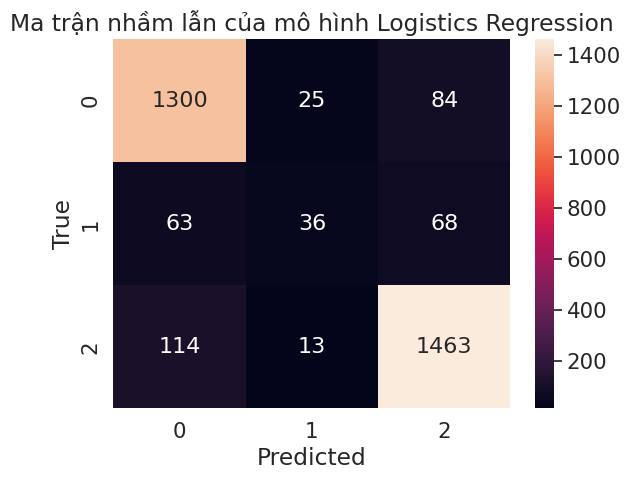

In [94]:
import seaborn as sns
cm_lr = confusion_matrix(y_test_values,lrc_predict)
sns.set(font_scale=1.4)
sns.heatmap(cm_lr, annot=True, annot_kws={"size": 16}, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Ma trận nhầm lẫn của mô hình Logistics Regression')
plt.show()

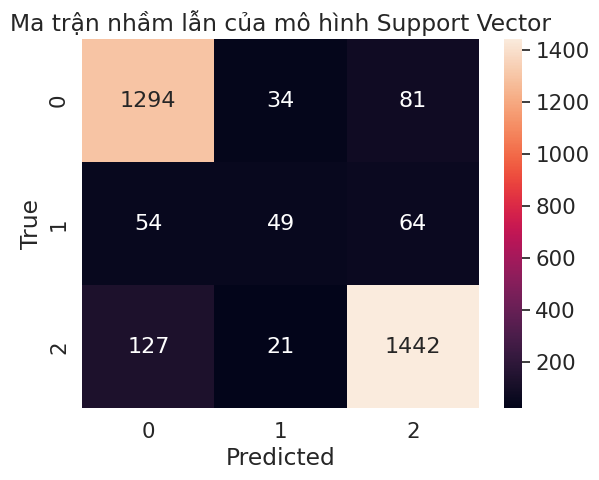

In [93]:
cm_svc = confusion_matrix(y_test_values,svc_pred)
sns.set(font_scale=1.4)
sns.heatmap(cm_svc, annot=True, annot_kws={"size": 16}, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Ma trận nhầm lẫn của mô hình Support Vector')
plt.show()

<hr>
<center>HẾT
<hr>